Python notebook to classify if team makes NCAA tournament using cbb_tourney_model_data.csv
Going to use random forest classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load in tourney data
tourney_data = pd.read_csv('cbb_tourney_model_data.csv')
tourney_data.head()

,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,3P_O,3P_D,ADJ_T,TOURNEY,POWER_CONF
0,123.3,94.9,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,32.7,36.2,71.7,1,1
1,129.1,93.6,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,36.5,37.5,59.3,1,1
2,114.4,90.4,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,35.2,33.2,65.9,1,1
3,115.2,85.2,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,36.5,29.7,67.5,1,1
4,117.8,86.3,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,38.2,29.0,71.5,1,1


In [3]:
#Now use a random forest classifier to predict tournament qualification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Prepare the data
Y = tourney_data['TOURNEY']
X = tourney_data.drop(columns=['TOURNEY'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=12)
rf_model.fit(X_train, Y_train)
# Make predictions
Y_pred = rf_model.predict(X_test)
# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[657  20]
 [ 62 110]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       677
           1       0.85      0.64      0.73       172

    accuracy                           0.90       849
   macro avg       0.88      0.80      0.83       849
weighted avg       0.90      0.90      0.90       849



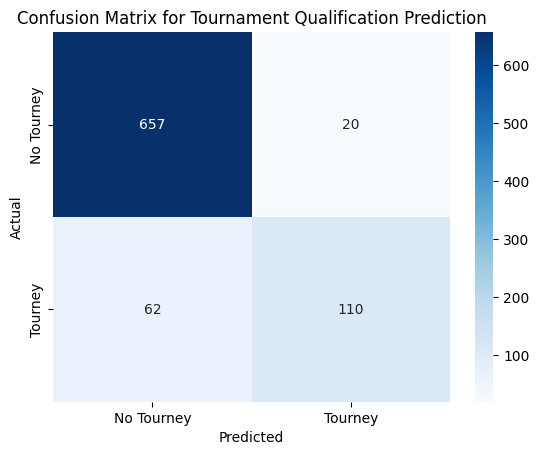

Accuracy: 0.90


In [4]:
#plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tourney', 'Tourney'], yticklabels=['No Tourney', 'Tourney'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tournament Qualification Prediction')
plt.show()
#print accuracy
accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)
print(f'Accuracy: {accuracy:.2f}')

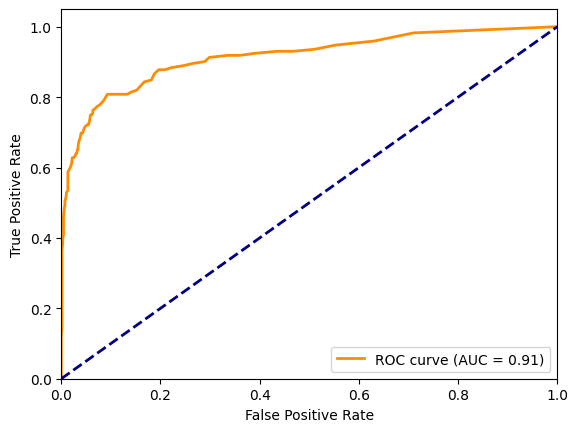

In [5]:
#plot ROC curve
from sklearn.metrics import roc_curve, auc
Y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Feature Importances:
ADJOE         0.229557
ADJDE         0.161009
EFG_O         0.080949
EFG_D         0.079478
TOR           0.059667
3P_D          0.054588
ORB           0.052934
3P_O          0.049533
DRB           0.043255
FTR           0.041751
TORD          0.041559
ADJ_T         0.040537
FTRD          0.038599
POWER_CONF    0.026585
dtype: float64


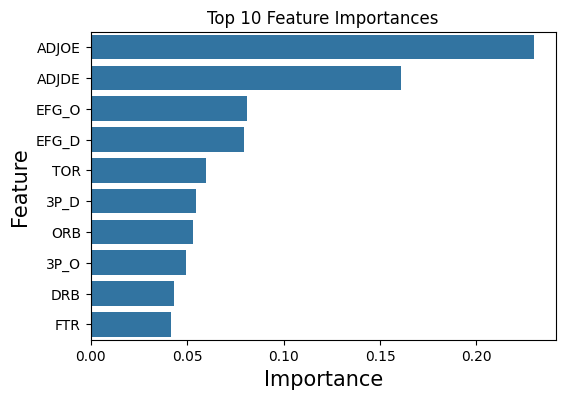

In [18]:
# most important features
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)
#plot feature importances
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importances.values[:10], y=feature_importances.index[:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.show()

Will expand on this, but that worked way better than i thought it would

Now do this again, but with the one hot encoding version

In [7]:
#load data for tourney prediction with one-hot encoding for conference
tourney_data_ohe = pd.read_csv('cbb_tourney_ohe_model_data.csv')
tourney_data_ohe.head()

,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,...,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
0,123.3,94.9,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,...,False,False,False,False,False,False,False,False,False,False
1,129.1,93.6,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,...,False,False,False,False,False,False,False,False,False,False
2,114.4,90.4,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,...,False,False,False,False,False,False,False,False,False,False
3,115.2,85.2,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,...,False,False,False,False,False,False,False,False,False,False
4,117.8,86.3,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,...,False,False,False,False,False,False,False,False,False,True


In [8]:
# do the same random forest classification with one-hot encoded data
# Prepare the data
Y_ohe = tourney_data_ohe['TOURNEY']
X_ohe = tourney_data_ohe.drop(columns=['TOURNEY'])
X_train_ohe, X_test_ohe, Y_train_ohe, Y_test_ohe = train_test_split(X_ohe, Y_ohe, test_size=0.2, random_state=12)
# Create and train the model
rf_model_ohe = RandomForestClassifier(n_estimators=100, random_state=12)
rf_model_ohe.fit(X_train_ohe, Y_train_ohe)
# Make predictions
Y_pred_ohe = rf_model_ohe.predict(X_test_ohe)
# Evaluate the model
print(confusion_matrix(Y_test_ohe, Y_pred_ohe))
print(classification_report(Y_test_ohe, Y_pred_ohe))

[[661  16]
 [ 64 108]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       677
           1       0.87      0.63      0.73       172

    accuracy                           0.91       849
   macro avg       0.89      0.80      0.84       849
weighted avg       0.90      0.91      0.90       849



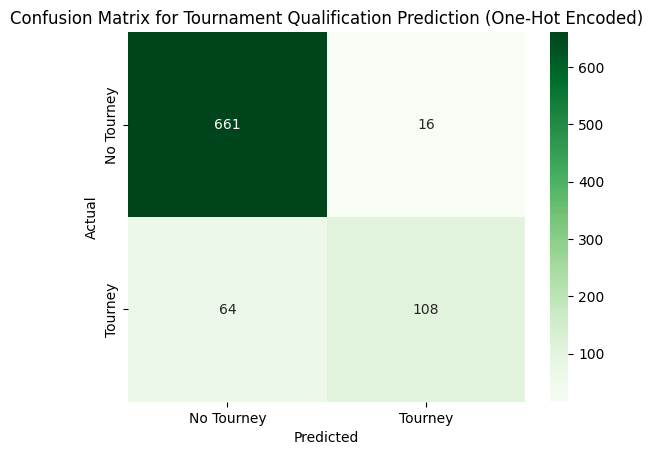

Accuracy (One-Hot Encoded): 0.91


In [9]:
#show confusion matrix and accuracy for one-hot encoded model
cm_ohe = confusion_matrix(Y_test_ohe, Y_pred_ohe)
sns.heatmap(cm_ohe, annot=True, fmt='d', cmap='Greens', xticklabels=['No Tourney', 'Tourney'], yticklabels=['No Tourney', 'Tourney'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tournament Qualification Prediction (One-Hot Encoded)')
plt.show()
accuracy_ohe = (cm_ohe[0,0] + cm_ohe[1,1]) / np.sum(cm_ohe)
print(f'Accuracy (One-Hot Encoded): {accuracy_ohe:.2f}')

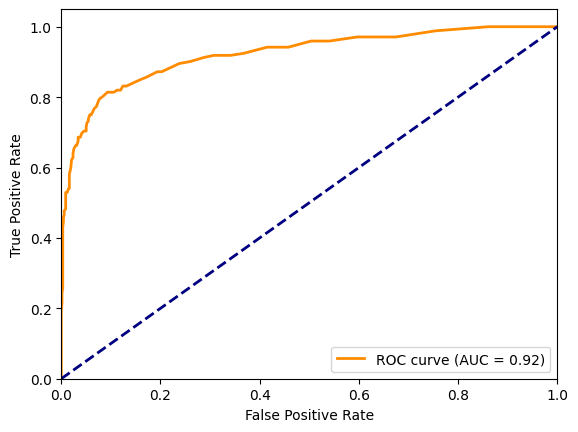

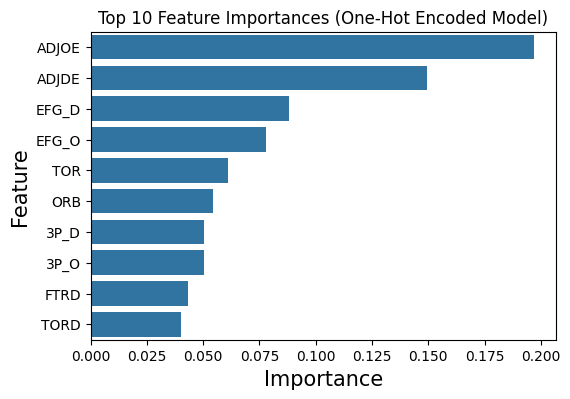

Feature Importances (One-Hot Encoded Model):
ADJOE    0.196728
ADJDE    0.149578
EFG_D    0.088283
EFG_O    0.077971
TOR      0.060795
ORB      0.054212
3P_D     0.050322
3P_O     0.050181
FTRD     0.043063
TORD     0.040287
dtype: float64


In [15]:
#show ROC curve for one-hot encoded model
Y_prob_ohe = rf_model_ohe.predict_proba(X_test_ohe)[:, 1]
fpr_ohe, tpr_ohe, thresholds_ohe = roc_curve(Y_test_ohe, Y_prob_ohe)
roc_auc_ohe = auc(fpr_ohe, tpr_ohe)
plt.figure()
plt.plot(fpr_ohe, tpr_ohe, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_ohe)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
# most important features for one-hot encoded model
importances_ohe = rf_model_ohe.feature_importances_
feature_names_ohe = X_ohe.columns
feature_importances_ohe = pd.Series(importances_ohe, index=feature_names_ohe).sort_values(ascending=False)
#plot feature importances for one-hot encoded model
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importances_ohe.values[:10], y=feature_importances_ohe.index[:10])
plt.title('Top 10 Feature Importances (One-Hot Encoded Model)')
plt.xlabel('Importance', fontsize=15)

plt.ylabel('Feature', fontsize=15)
plt.show()
print("Feature Importances (One-Hot Encoded Model):")
print(feature_importances_ohe.head(10))